## SyriaTel Customer Churn

#### Introduction

The objective of this project is to predict customer churn for SyriaTel, allowing the business to implement proactive measures 
that prevent churn and improve customer retention. Stakeholders such as the customer success team and marketing department 
can use these predictions to identify at-risk customers and offer targeted promotions or interventions to retain them. 
This reduces customer acquisition costs and directly impacts profitability by lowering churn rates.

By addressing this real-world problem, SyriaTel can improve its customer retention strategies and focus efforts where 
they are most needed, ultimately leading to better financial performance.




### 1. Business Problem

Churn prediction is crucial for businesses as retaining customers is often more cost-effective than acquiring new ones. By accurately predicting customer churn, the business can take proactive measures to retain customers, thereby reducing churn rates and improving profitability.



### 2. Data Collection

We are using the SyriaTel dataset with features like account length, number of customer service calls, and total day minutes. 
These features are essential for predicting churn because they provide insight into customer behavior patterns. 
For example, a high number of customer service calls may indicate dissatisfaction, making it a strong predictor of churn.

Other features like total day minutes and total day charge reflect customer usage, which may be linked to their engagement 
with the service. Lower engagement or excessive service usage (indicating dissatisfaction) could correlate with churn risk.

Number of features: 21 (after excluding 'phone number' and the target variable)

#### Data Import and Initial Inspection

Let's load the dataset and take a look at the first few rows to understand its structure.

In [2]:
import os
import pandas as pd

# Define the path to the CSV file
file_path = os.path.join('Data', 'bigml_59c28831336c6604c800002a.csv')

# Load the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the data to inspect it
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 3. Data Exploration and Preprocessing
#### Exploratory Data Analysis (EDA)
Before preprocessing, let's explore the target variable to understand the distribution of churned vs. non-churned customers.



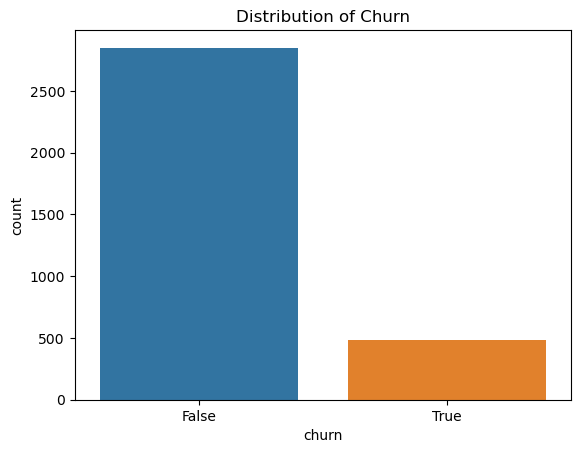

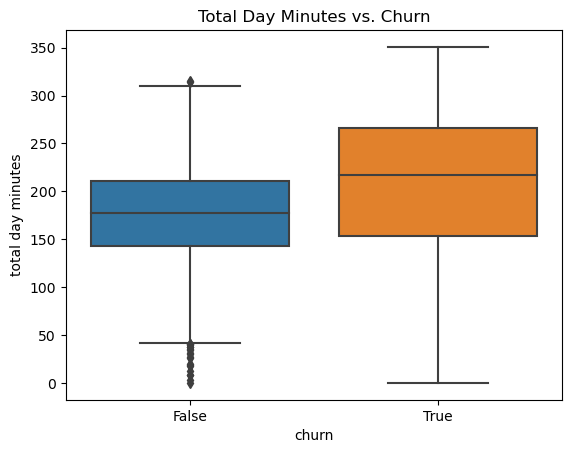

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Visualize relationships between key features and the target variable
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs. Churn')
plt.show()


#### Explanation of Charts

Distribution of Churn

* The first bar chart shows the distribution of customers who have churned (True) vs. those who haven’t (False). The data is highly imbalanced, with significantly more customers not churning.

Total Day Minutes vs. Churn

* The second box plot compares the total day minutes for churned and non-churned customers. Customers who churn tend to have higher total day minutes on average compared to those who don’t churn.


### Data Preparation: Target Encoding and Feature Selection

In this section, we prepare the data for modeling:

- **Target Encoding**: The target variable ('churn') is label encoded into 0 (No Churn) and 1 (Churn) for model compatibility.
  
- **Feature Selection**: We define `X` by dropping irrelevant columns (e.g., 'phone number') and set `y` as the encoded 'churn' column.

- **Feature Groups**: Categorical features (`state`, `international plan`, `voice mail plan`) are separated for one-hot encoding, while numerical features are kept for scaling.


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'churn'
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])

# Define feature columns and target column
X = data.drop(columns=['phone number', 'churn'])  # Dropping 'phone number' as it is likely not useful
y = data['churn']

# Handle categorical variables: 'state', 'international plan', 'voice mail plan'
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X.columns.difference(categorical_features)


### 4. Baseline Model: Logistic Regression with Preprocessing

We build a pipeline that integrates data preprocessing and logistic regression training in one step:

- **Preprocessing**: 
  - **Numerical features** are scaled using `StandardScaler`.
  - **Categorical features** are imputed with the most frequent value and one-hot encoded. The encoder handles unseen categories in test data with `handle_unknown='ignore'`.

- **Train-Test Split**: The data is split 80/20 with `stratify=y` to maintain the same churn distribution in both sets.

- **Pipeline**: The pipeline combines preprocessing and training using `LogisticRegression` with `max_iter=1000` to ensure convergence, making the process streamlined and consistent.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import StandardScaler and OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline and model training
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
baseline_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['account length', 'area code', 'customer service calls',
       'number vmail messages', 'total day calls', 'total day charge',
       'total day minutes', 'total eve calls', 'total eve charge',
       'total eve minutes', 'total intl calls', 'total intl charge',
       'total intl minutes', 'total night calls', 'total night charge',
       'total night minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

### Model Evaluation: Logistic Regression Baseline

We evaluate the baseline logistic regression model's performance using key metrics:

- **Accuracy**: The proportion of correct predictions for both churn and non-churn customers.
- **Classification Report**:
  - **Precision**: Proportion of correctly predicted churners out of all predicted churners (lower false positives).
  - **Recall**: Proportion of actual churners correctly identified (lower false negatives).
  - **F1-Score**: A balance between precision and recall.

These metrics provide insight into the model's ability to predict churn effectively, helping balance between precision and recall for business decisions.


In [6]:
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline, target_names=['No Churn', 'Churn'])

print(f"Baseline Model Accuracy: {baseline_accuracy}")
print(f"Baseline Model Classification Report:\n{baseline_report}")


Baseline Model Accuracy: 0.8605697151424287
Baseline Model Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92       570
       Churn       0.54      0.26      0.35        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.83      0.86      0.84       667



### Baseline Model Analysis: Logistic Regression

The model performs well in predicting **non-churners**, with high precision and recall for this class. However, it struggles to identify actual **churners**, as shown by the low recall for the churn class. This is critical for the business because missing churners (false negatives) directly impacts customer retention efforts.

### Business Implications:
While the model can correctly predict customers likely to stay, it fails to identify a significant portion of customers at risk of leaving. **Improving recall for churn** is essential to prevent customer loss and better allocate retention resources. This baseline highlights the need for strategies like class balancing or more advanced models to enhance churn detection.


### 5. Moving to a Random Forest Model

Given the **logistic regression** model's limitations in predicting churn, we now turn to a **Random Forest** to improve performance, especially for churn prediction.

- **Why Random Forest?**:
  - **Handling Imbalanced Data**: Random Forest averages multiple decision trees, balancing focus across both classes (churn/no churn), improving churn recall for imbalanced datasets.
  - **Improving Precision**: The ensemble approach reduces false positives, providing more reliable churn predictions.
  - **Accuracy**: Random Forest captures complex interactions in customer data (e.g., service calls, day minutes) and improves overall accuracy.

By using Random Forest, we aim to increase **churn recall** while maintaining or improving precision, leading to better identification of at-risk customers.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline and model training with Random Forest
forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

forest_model.fit(X_train, y_train)


### Random Forest Model Training Explained

We trained a **Random Forest** model using the same preprocessing pipeline to handle both numerical and categorical features. The model leverages multiple decision trees to improve churn prediction by addressing class imbalance and capturing complex patterns in customer data. This approach is expected to enhance **churn recall** while maintaining accuracy and reducing false positives.


### Random Forest Model Evaluation

This code evaluates the Random Forest model by predicting churn on the test data and calculating the accuracy, precision, recall, and F1-score to assess model performance, particularly for the churn class.


In [8]:
y_pred_forest = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_report = classification_report(y_test, y_pred_forest, target_names=['No Churn', 'Churn'])

print(f"Random Forest Model Accuracy: {forest_accuracy}")
print(f"Random Forest Model Classification Report:\n{forest_report}")


Random Forest Model Accuracy: 0.9370314842578711
Random Forest Model Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.99      0.96       570
       Churn       0.91      0.63      0.74        97

    accuracy                           0.94       667
   macro avg       0.93      0.81      0.85       667
weighted avg       0.94      0.94      0.93       667



### Random Forest Model Results

- **Accuracy**: Achieved **93.7%**, a notable improvement over logistic regression's 86%.
- **Churn Recall**: Increased to **63%** (vs. 26% in logistic regression), significantly improving the model's ability to capture actual churners.

#### Comparison to Logistic Regression:
- **Strengths**:
  1. Higher **recall for churn** and overall accuracy.
  2. Better balance between precision and recall for both classes.

- **Limitations**:
  1. Still room for improvement in **churn recall** (63%).
  2. Slight increase in **false positives** for churn predictions.

#### Conclusion:
While we have improved churn recall, our priority remains **further increasing churn recall** to capture more at-risk customers, which will require additional tuning.


### 6. Hypertuned Model

#### Why Build a LightGBM Model After Random Forest?

#### Random Forest Limitations
The Random Forest model achieves good accuracy but has **low churn recall (63%)**, meaning it fails to identify many customers at risk of leaving. Since the business goal is to reduce churn, improving recall is essential to capture more potential churners.

#### Why LightGBM?
LightGBM offers several advantages to address these limitations:
- **Better Recall**: LightGBM handles class imbalance more effectively, boosting recall for the churn class.
- **Faster Tuning**: Its gradient-boosting approach enables quicker model training and hyperparameter tuning.
- **Flexible Threshold**: LightGBM allows adjusting the decision threshold, prioritizing recall over precision.

#### Focus on Churn Recall
The business **prioritizes churn recall** to catch as many churners as possible. **False positives** (customers predicted to churn but don’t) are less costly than **false negatives**, where actual churners are missed. Maximizing recall ensures proactive retention efforts, even if it slightly impacts precision.




In [14]:
from lightgbm import LGBMClassifier


# Convert the object dtype columns to categorical dtype
X_train['state'] = X_train['state'].astype('category')
X_train['international plan'] = X_train['international plan'].astype('category')
X_train['voice mail plan'] = X_train['voice mail plan'].astype('category')

X_test['state'] = X_test['state'].astype('category')
X_test['international plan'] = X_test['international plan'].astype('category')
X_test['voice mail plan'] = X_test['voice mail plan'].astype('category')

# Train LightGBM model after converting to 'category'
lgb_model = LGBMClassifier(random_state=42, scale_pos_weight=5, verbosity=-1)

# Fit the model
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_probs_lgb = lgb_model.predict_proba(X_test)[:, 1]
y_pred_lgb_threshold = (y_probs_lgb >= 0.30).astype(int)

accuracy_lgb_threshold = accuracy_score(y_test, y_pred_lgb_threshold)
classification_report_lgb = classification_report(y_test, y_pred_lgb_threshold, target_names=['No Churn', 'Churn'])




In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Refined parameter grid
param_grid_lgb_refined = {
    'num_leaves': [32, 55],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [200, 300],
    'scale_pos_weight': [3.5, 4.5],  # Finer tuning for class imbalance
    'min_child_weight': [6.5, 9.5],  # More aggressive regularization
    'max_depth': [3, 5],  # More regularized depth
    'lambda_l1': [0.1, 0.5],  # L1 regularization
    'lambda_l2': [0.1, 0.5],  # L2 regularization
}

# StratifiedKFold for balanced cross-validation
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# RandomizedSearchCV with StratifiedKFold
random_search_lgb_refined = RandomizedSearchCV(
    lgb_model, param_distributions=param_grid_lgb_refined,
    n_iter=30, cv=stratified_kfold, scoring='recall', verbose=2, random_state=42, n_jobs=-1
)

# Fit the model
random_search_lgb_refined.fit(X_train, y_train)

# Best model and predictions
best_lgb_model_refined = random_search_lgb_refined.best_estimator_
y_probs_lgb_refined = best_lgb_model_refined.predict_proba(X_test)[:, 1]

# Adjust threshold (e.g., 0.38 or 0.39)
y_pred_lgb_refined_threshold = (y_probs_lgb_refined >= 0.43).astype(int)

# Evaluate performance
accuracy_lgb_refined_threshold = accuracy_score(y_test, y_pred_lgb_refined_threshold)
classification_report_lgb_refined = classification_report(y_test, y_pred_lgb_refined_threshold, target_names=['No Churn', 'Churn'])


print(f"LightGBM Refined Classification Report:\n{classification_report_lgb_refined}")


Fitting 4 folds for each of 30 candidates, totalling 120 fits
LightGBM Refined Classification Report:
              precision    recall  f1-score   support

    No Churn       0.97      0.94      0.95       570
       Churn       0.70      0.80      0.75        97

    accuracy                           0.92       667
   macro avg       0.83      0.87      0.85       667
weighted avg       0.93      0.92      0.92       667



### Refined LightGBM Model Results

- **Accuracy**: **92%**, slightly lower than Random Forest's 93.7%.
- **Churn Recall**: Improved to **80%** (from 63% in Random Forest), meaning the model captures more actual churners.

#### Comparison to Random Forest:
- **Strengths**:
  1. **Higher churn recall** (80% vs. 63%), crucial for identifying at-risk customers.
  2. Balanced performance with **fewer false negatives**, better aligning with business goals.

- **Limitations**:
  1. Slightly lower **overall accuracy** compared to Random Forest.
  2. **Precision for churn** is lower (70%), meaning more false positives compared to Random Forest.

### Conclusion:
Despite a drop in overall accuracy, the LightGBM model is more effective than Random Forest because it significantly improves **churn recall**, which is the priority for identifying customers at risk of leaving.


### Feature Importance

Performing feature importance analysis helps identify the key factors driving the model's predictions. While it doesn't improve the model's performance, it offers two main benefits:

- **Business Insights**: Knowing which features contribute most to churn (e.g., customer service calls, international plan) allows the business to focus retention efforts on these areas, making strategies more data-driven.
  
- **Model Interpretability**: It enhances transparency, making it easier to explain the model's decisions to stakeholders and gain trust in the predictions.

We will conduct feature importance analysis on the chosen model, the **refined LightGBM model**, to identify the key drivers of customer churn and enhance business decision-making.



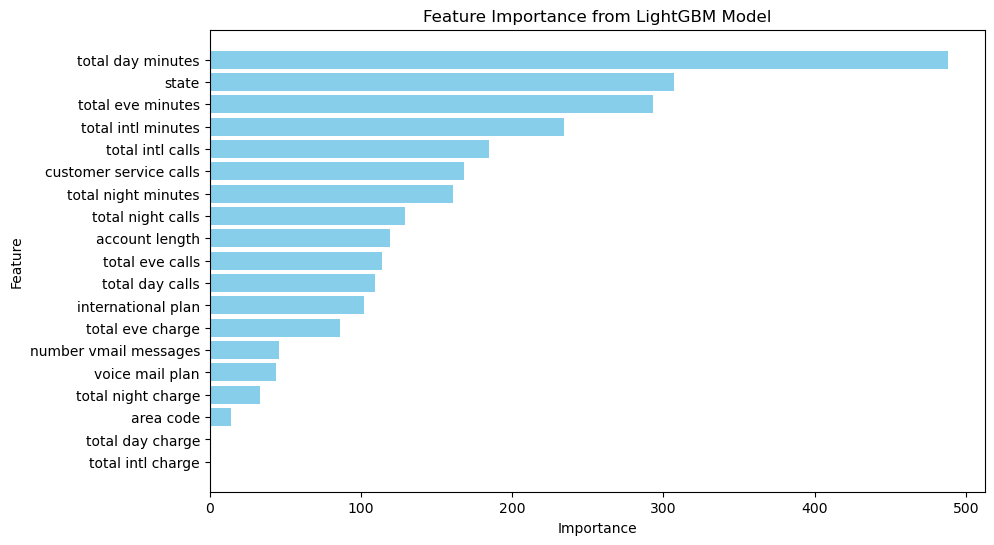

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the LightGBM model
feature_importances = best_lgb_model_refined.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LightGBM Model')
plt.gca().invert_yaxis()
plt.show()


### Feature Importance Analysis: Business Implications

The **most important features** for predicting churn, such as **total day minutes**, **state**, and **total evening minutes**, highlight the significance of customer usage patterns and geographic location in determining churn risk. Customers with high usage (e.g., total day minutes) may be more likely to churn, potentially due to dissatisfaction with pricing or service quality.


These insights directly contribute to the improved churn recall by helping the business focus on key factors that drive customer attrition, allowing for more effective and targeted retention efforts.


## Conclusion

The refined **LightGBM model** offers improved **churn recall** (80%), making it highly effective in identifying customers at risk of leaving. This enables SyriaTel to implement more precise strategies for customer retention based on the most important predictive factors.

### Key Business Solutions:

1. **Proactive Engagement with High-Usage Customers**: Offer personalized plans to customers with high **total day minutes** to prevent churn.
2. **Geographic Targeting**: Use **state** as a key indicator to create location-specific retention strategies.
3. **Monitor High-Service Interaction Customers**: Track frequent **customer service calls** and provide better support to reduce churn.

Prioritizing **churn recall** ensures that the business can focus efforts on retaining more at-risk customers, maximizing the effectiveness of retention campaigns.

### Next Steps:

1. **Develop Targeted Campaigns**: Launch marketing or retention campaigns focusing on high-usage customers and at-risk geographic regions based on model insights.
2. **Integrate Churn Predictions into CRM**: Incorporate churn predictions into SyriaTel’s customer relationship management system to trigger real-time alerts for proactive retention efforts.